In [8]:
import os
import numpy as np

import matplotlib.pyplot as plt

from antea.io.mc_io import load_sns_positions

In [4]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_charge/selecting_areas/'

thr_ch_start  = 0
thr_ch_nsteps = 5

chargs_a0 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
chargs_a1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
chargs_a2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
chargs_a3 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
chargs_a4 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
chargs_a5 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evt_ids   = []

for filename in os.listdir(evts_path):
    if filename.endswith('10_0_5.npz'):
        my_file   = evts_path+filename
        d = np.load(my_file, allow_pickle=True)
        evt_ids = np.concatenate((np.array(d['evt_ids']), evt_ids))
        for j in range(thr_ch_start, thr_ch_nsteps):
            chargs_a0[j] = np.concatenate((np.array(d['chargs_a0'][j]), chargs_a0[j]))
            chargs_a1[j] = np.concatenate((np.array(d['chargs_a1'][j]), chargs_a1[j]))
            chargs_a2[j] = np.concatenate((np.array(d['chargs_a2'][j]), chargs_a2[j]))
            chargs_a3[j] = np.concatenate((np.array(d['chargs_a3'][j]), chargs_a3[j]))
            chargs_a4[j] = np.concatenate((np.array(d['chargs_a4'][j]), chargs_a4[j]))
            chargs_a5[j] = np.concatenate((np.array(d['chargs_a5'][j]), chargs_a5[j]))

chargs_a0 = np.array(chargs_a0)
chargs_a1 = np.array(chargs_a1)
chargs_a2 = np.array(chargs_a2)
chargs_a3 = np.array(chargs_a3)
chargs_a4 = np.array(chargs_a4)
chargs_a5 = np.array(chargs_a5)
evt_ids   = np.array(evt_ids)

In [25]:
all_charges = [chargs_a0, chargs_a1, chargs_a2, chargs_a3, chargs_a4, chargs_a5]

area0 = [8, 28, 37, 57]
area1 = [7, 15, 16, 19, 20, 27, 38, 45, 46, 49, 50, 58]
area2 = [6, 10, 11, 12, 14, 18, 22, 23, 24, 26, 39, 41, 42, 43, 47, 51, 53, 54, 55, 59]
area3 = [1, 2, 3, 4, 5, 9, 13, 17, 21, 25, 29, 30, 31, 32, 33, 34, 35, 36, 40, 44, 48, 52, 56, 60, 61, 62, 63, 64]
area4 = area0 + area1
area5 = area0 + area1 + area2

areas = [area0, area1, area2, area3, area4, area5]
labs  = ['area0', 'area1', 'area2', 'area3', 'area4', 'area5']

In [9]:
filespath = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_h5/'
filename  = filespath + 'PetBox_asymmetric_HamamatsuVUV.2500.pet.h5'

sns_positions = load_sns_positions(filename)
sel       = sns_positions.z.values<0
sens_xpos = sns_positions.x.values[sel]
sens_ypos = sns_positions.y.values[sel]
sens_ids  = sns_positions.sensor_id.values[sel]

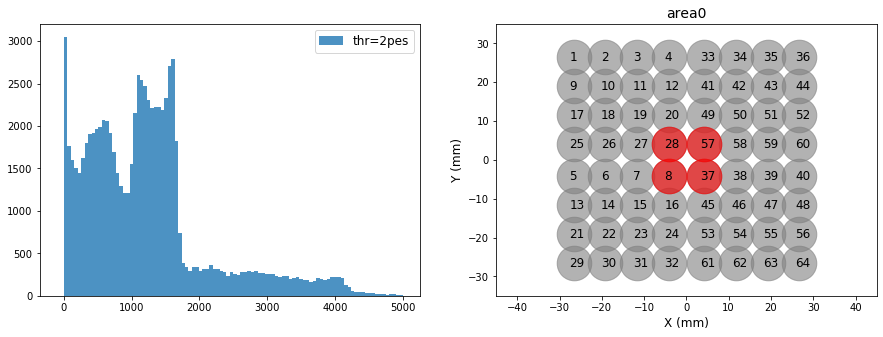

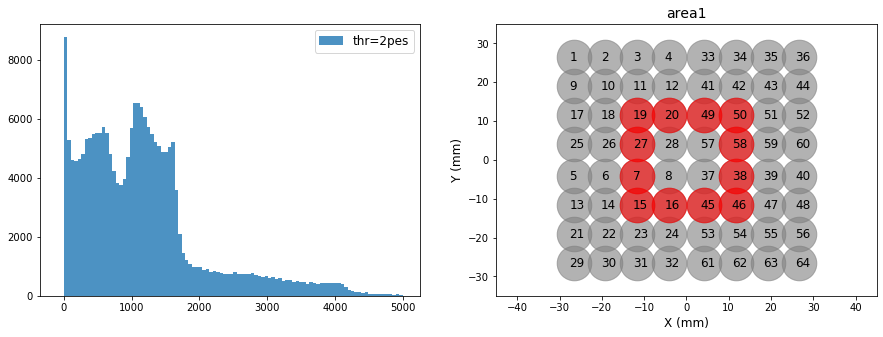

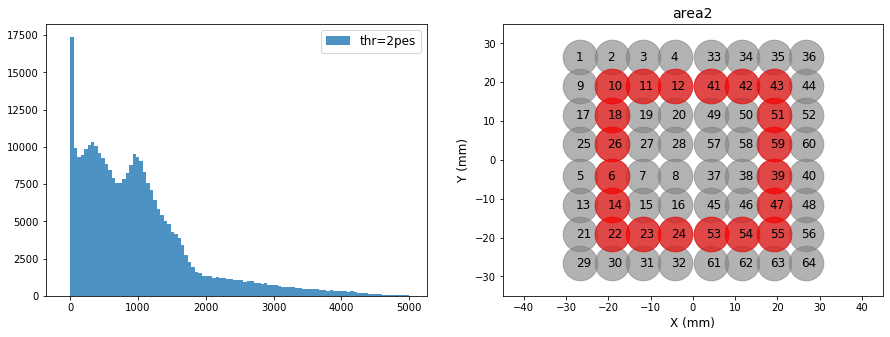

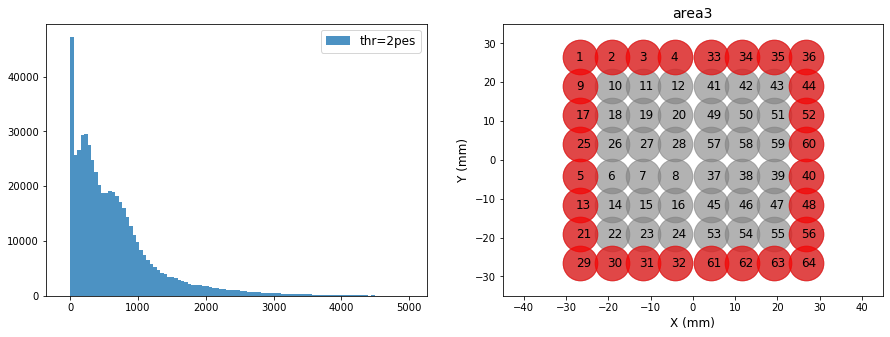

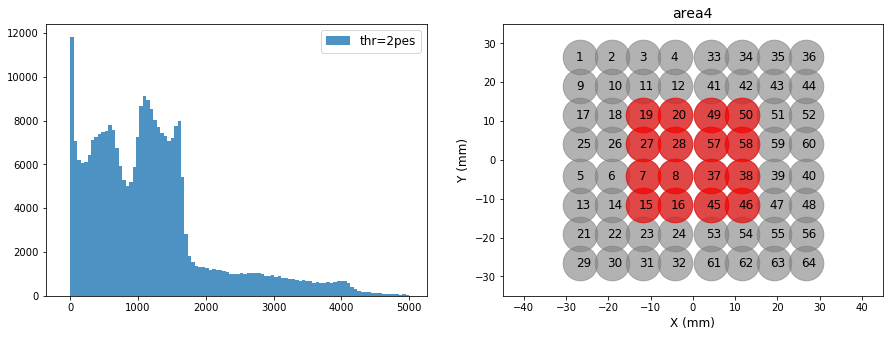

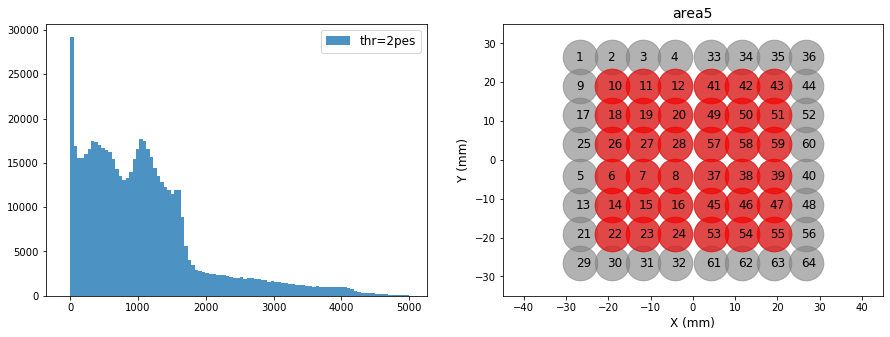

In [27]:
for chargs_area, area, lab in zip(all_charges, areas, labs):
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    for j in range(thr_ch_start, thr_ch_nsteps):
        if j ==2:
            fig0 = ax0.hist(chargs_area[j], 100, (-100, 5000), label=f'thr={j}pes', alpha=0.8)

    indx_area = np.array([np.where(sens_ids == i)[0][0] for i in area])
    xpos_area = sns_positions.x.values[sel][indx_area]
    ypos_area = sns_positions.y.values[sel][indx_area]
    
    xpos_area_left = sns_positions.x.values[sel][~indx_area]
    ypos_area_left = sns_positions.y.values[sel][~indx_area]
    
    ax1.scatter(sens_xpos, sens_ypos, marker='o', s=1200, alpha=0.6, color='grey')
    ax1.scatter(xpos_area, ypos_area, marker='o', s=1200, alpha=0.6, color='r')
    
    for i, (x, y, s_id) in enumerate(zip(sens_xpos, sens_ypos, sens_ids)):
        ax1.text(x-1, y-1, s=str(s_id), fontsize=12)

    ax1.set_xlim(-45, 45)
    ax1.set_ylim(-35, 35)
    ax1.set_xlabel("X (mm)", fontsize=12)
    ax1.set_ylabel("Y (mm)", fontsize=12)

    ax0.legend(fontsize=12, loc=1)
    plt.title(f'{lab}', fontsize=14)
    plt.show()

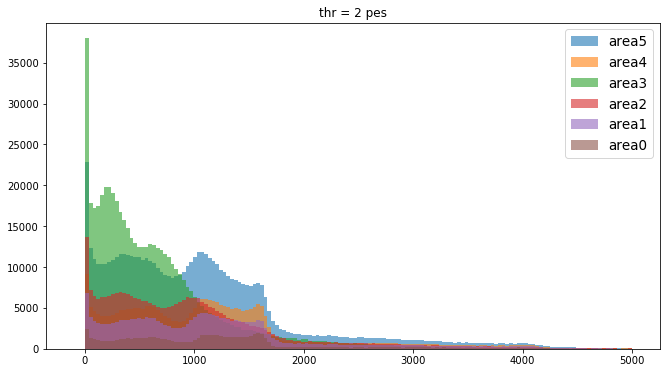

In [37]:
plt.rcParams["figure.figsize"] = 11, 6
for chargs_area, lab in zip(reversed(all_charges), reversed(labs)):
    for j in range(thr_ch_start, thr_ch_nsteps):
        if j == 2:
            plt.hist(chargs_area[j], 150, (-100, 5000), label=f'{lab}', alpha=0.6)
plt.title('thr = 2 pes')
plt.legend(fontsize=13.5);